In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# y = mx + b
# m = slope, b = y-intercept
x = np.linspace(-10, 10, 100) 
m = 0.5
y = m * x + 2

Text(0.5, 1.0, 'Linear function')

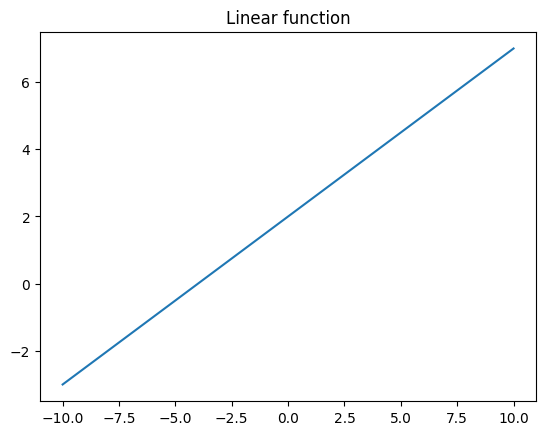

In [4]:
plt.plot(x, y)
plt.title('Linear function')

In [5]:
# Quadratic Eqn
# y = (x + 2)(5x - 9)
# y = 5x ** 2 + x - 18 -> ax^2 + bx + c
# a = 5, b = 1, c = -18
x = np.linspace(-10, 10, 100)

a = 5 * x ** 2
b = x
c = -18

y = a + b + c



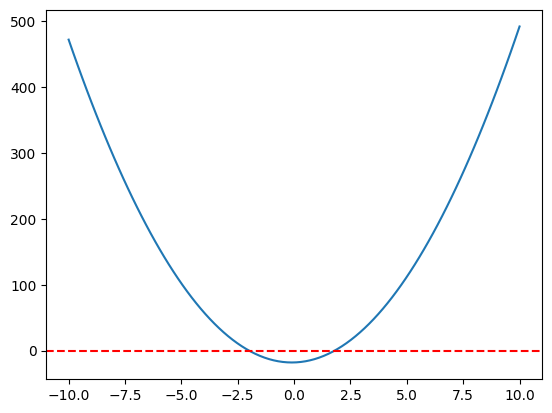

In [6]:
plt.plot(x, y)
plt.axhline(y=0, color='r', linestyle='--')

In [7]:
# f(x) = 5x^ 2 + x - 18

def f(x):
    return 5 * x ** 2 + x - 18


In [8]:
f(3)

30

In [9]:
# dy/dx = (f(x + h) - f(x)) / h

h = 0.0000001
x = 0
(f(x+h) - f(x)) / h

# as h -> 0, x -> 1 [true value of deravitive of f(x) at x = 0]

1.0000005090660125

In [10]:
import sys
sys.path.append("../core")

import random
from special import Special

In [11]:
def f(x):
    return (x - 3) ** 2

x = Special(0.0, requires_grad=True)

for step in range(100):
    loss = f(x)
    loss.backward()
    lr = 0.1
    x.data -= lr * x.grad
    x.grad = 0.0
    print(f'Step = {step} | x = {x.data:.4f} | loss = {loss.data:.4f}')

Step = 0 | x = 0.6000 | loss = 9.0000
Step = 1 | x = 1.0800 | loss = 5.7600
Step = 2 | x = 1.4640 | loss = 3.6864
Step = 3 | x = 1.7712 | loss = 2.3593
Step = 4 | x = 2.0170 | loss = 1.5099
Step = 5 | x = 2.2136 | loss = 0.9664
Step = 6 | x = 2.3709 | loss = 0.6185
Step = 7 | x = 2.4967 | loss = 0.3958
Step = 8 | x = 2.5973 | loss = 0.2533
Step = 9 | x = 2.6779 | loss = 0.1621
Step = 10 | x = 2.7423 | loss = 0.1038
Step = 11 | x = 2.7938 | loss = 0.0664
Step = 12 | x = 2.8351 | loss = 0.0425
Step = 13 | x = 2.8681 | loss = 0.0272
Step = 14 | x = 2.8944 | loss = 0.0174
Step = 15 | x = 2.9156 | loss = 0.0111
Step = 16 | x = 2.9324 | loss = 0.0071
Step = 17 | x = 2.9460 | loss = 0.0046
Step = 18 | x = 2.9568 | loss = 0.0029
Step = 19 | x = 2.9654 | loss = 0.0019
Step = 20 | x = 2.9723 | loss = 0.0012
Step = 21 | x = 2.9779 | loss = 0.0008
Step = 22 | x = 2.9823 | loss = 0.0005
Step = 23 | x = 2.9858 | loss = 0.0003
Step = 24 | x = 2.9887 | loss = 0.0002
Step = 25 | x = 2.9909 | loss = 0.0

#### Logistic Regression

In [12]:
data = (
    (0.0, 0),
    (1.0, 0),
    (2.0, 1),
    (3.0, 1),
)

# small random initialization
w = Special(random.uniform(-0.1, 0.1), requires_grad=True)
b = Special(random.uniform(-0.1, 0.1), requires_grad=True)

for epoch in range(500):
    total_loss = 0.0

    for x_val, y_true in data:

        x = Special(x_val)

        # forward
        logits = w * x + b
        y_pred = logits.sigmoid()
        # loss
        loss = -(y_true * y_pred.log() + (1 - y_true) * (1 - y_pred).log())
        total_loss += loss.data

        # backward
        loss.backward()

        # gradient descent
        lr = 0.5
        w.data -= lr * w.grad
        b.data -= lr * b.grad

        # zero grad
        w.grad = 0.0
        b.grad = 0.0
    print(f'Epoch: {epoch:>4} | Loss: {total_loss:.4f}')

Epoch:    0 | Loss: 2.7085
Epoch:    1 | Loss: 2.2833
Epoch:    2 | Loss: 2.0151
Epoch:    3 | Loss: 1.7920
Epoch:    4 | Loss: 1.6152
Epoch:    5 | Loss: 1.4739
Epoch:    6 | Loss: 1.3588
Epoch:    7 | Loss: 1.2633
Epoch:    8 | Loss: 1.1826
Epoch:    9 | Loss: 1.1133
Epoch:   10 | Loss: 1.0532
Epoch:   11 | Loss: 1.0003
Epoch:   12 | Loss: 0.9534
Epoch:   13 | Loss: 0.9114
Epoch:   14 | Loss: 0.8735
Epoch:   15 | Loss: 0.8392
Epoch:   16 | Loss: 0.8078
Epoch:   17 | Loss: 0.7791
Epoch:   18 | Loss: 0.7526
Epoch:   19 | Loss: 0.7281
Epoch:   20 | Loss: 0.7053
Epoch:   21 | Loss: 0.6841
Epoch:   22 | Loss: 0.6643
Epoch:   23 | Loss: 0.6458
Epoch:   24 | Loss: 0.6283
Epoch:   25 | Loss: 0.6119
Epoch:   26 | Loss: 0.5964
Epoch:   27 | Loss: 0.5818
Epoch:   28 | Loss: 0.5679
Epoch:   29 | Loss: 0.5547
Epoch:   30 | Loss: 0.5422
Epoch:   31 | Loss: 0.5303
Epoch:   32 | Loss: 0.5189
Epoch:   33 | Loss: 0.5081
Epoch:   34 | Loss: 0.4977
Epoch:   35 | Loss: 0.4878
Epoch:   36 | Loss: 0.4783
E

In [13]:
data = (
    (0.0, 0),
    (1.0, 1),
    (2.0, 1),
    (3.0, 1),
)

w1 = Special(random.uniform(-0.1, 0.1), requires_grad=True)
w2 = Special(random.uniform(-0.1, 0.1), requires_grad=True)
b1 = Special(random.uniform(-0.1, 0.1), requires_grad=True)
b2 = Special(random.uniform(-0.1, 0.1), requires_grad=True)

epochs = 500
lr = 0.5

for epoch in range(epochs):
    total_loss = 0

    for x_val, y_true in data:
        x_val = Special(x_val)

        # forward
        hidden = (w1 * x_val + b1).tanh()
        logits = w2 * hidden + b2

        y_pred = logits.sigmoid()

        # loss
        loss = -(y_true * y_pred.log() + (1 - y_true) * (1 - y_pred).log())
        total_loss += loss.data

        # backprop
        loss.backward()

        for param in [w1, b1, w2, b2]:
            param.data -= lr * param.grad
            param.grad = 0.0


    print(f'Epoch: {epoch:>3} | Loss: {total_loss:.4f}')


Epoch:   0 | Loss: 2.7769
Epoch:   1 | Loss: 2.4991
Epoch:   2 | Loss: 2.3655
Epoch:   3 | Loss: 2.2529
Epoch:   4 | Loss: 2.1340
Epoch:   5 | Loss: 1.9749
Epoch:   6 | Loss: 1.7579
Epoch:   7 | Loss: 1.4943
Epoch:   8 | Loss: 1.2195
Epoch:   9 | Loss: 0.9695
Epoch:  10 | Loss: 0.7662
Epoch:  11 | Loss: 0.6137
Epoch:  12 | Loss: 0.5029
Epoch:  13 | Loss: 0.4218
Epoch:  14 | Loss: 0.3611
Epoch:  15 | Loss: 0.3146
Epoch:  16 | Loss: 0.2780
Epoch:  17 | Loss: 0.2486
Epoch:  18 | Loss: 0.2245
Epoch:  19 | Loss: 0.2045
Epoch:  20 | Loss: 0.1877
Epoch:  21 | Loss: 0.1733
Epoch:  22 | Loss: 0.1609
Epoch:  23 | Loss: 0.1501
Epoch:  24 | Loss: 0.1406
Epoch:  25 | Loss: 0.1322
Epoch:  26 | Loss: 0.1247
Epoch:  27 | Loss: 0.1180
Epoch:  28 | Loss: 0.1120
Epoch:  29 | Loss: 0.1065
Epoch:  30 | Loss: 0.1015
Epoch:  31 | Loss: 0.0970
Epoch:  32 | Loss: 0.0928
Epoch:  33 | Loss: 0.0890
Epoch:  34 | Loss: 0.0855
Epoch:  35 | Loss: 0.0822
Epoch:  36 | Loss: 0.0792
Epoch:  37 | Loss: 0.0764
Epoch:  38 |

#### Testing MLP

In [14]:
import sys
sys.path.append("../")

from core.layers import MLP

In [15]:
# dummy data
x = [
    [2.0, 3,0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

y = [1.0, -1.0, -1.0, 1.0]

In [16]:
model = MLP(3, 4, 1, 1)

epochs = 500
lr = 0.005

for epoch in range(epochs):
    
    y_pred = [model(xi) for xi in x]
    loss = sum([(y_i - y_pred_i) ** 2 for y_i, y_pred_i in zip(y, y_pred)])
    loss.backward()
    for param in model.parameters():
        param.data -= lr * param.grad
    model.zero_grad()

    if epoch % 10 == 0:
        print(f'Epoch: {epoch:>4} | loss: {loss.data:.4f}')


Epoch:    0 | loss: 4.8222
Epoch:   10 | loss: 3.9433
Epoch:   20 | loss: 3.4522
Epoch:   30 | loss: 3.2331
Epoch:   40 | loss: 3.1061
Epoch:   50 | loss: 3.0185
Epoch:   60 | loss: 2.9536
Epoch:   70 | loss: 2.9038
Epoch:   80 | loss: 2.8644
Epoch:   90 | loss: 2.8326
Epoch:  100 | loss: 2.8063
Epoch:  110 | loss: 2.7842
Epoch:  120 | loss: 2.7653
Epoch:  130 | loss: 2.7489
Epoch:  140 | loss: 2.7345
Epoch:  150 | loss: 2.7217
Epoch:  160 | loss: 2.7101
Epoch:  170 | loss: 2.6996
Epoch:  180 | loss: 2.6899
Epoch:  190 | loss: 2.6808
Epoch:  200 | loss: 2.6723
Epoch:  210 | loss: 2.6642
Epoch:  220 | loss: 2.6563
Epoch:  230 | loss: 2.6487
Epoch:  240 | loss: 2.6411
Epoch:  250 | loss: 2.6335
Epoch:  260 | loss: 2.6257
Epoch:  270 | loss: 2.6176
Epoch:  280 | loss: 2.6091
Epoch:  290 | loss: 2.6000
Epoch:  300 | loss: 2.5901
Epoch:  310 | loss: 2.5791
Epoch:  320 | loss: 2.5667
Epoch:  330 | loss: 2.5524
Epoch:  340 | loss: 2.5357
Epoch:  350 | loss: 2.5156
Epoch:  360 | loss: 2.4909
E

### Bringing everything together

In [17]:
import sys
sys.path.append("../")

import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

from core.special import SScalar
from core.losses import BCELoss
from core.layers import MLP
from utils.optimizer import SGD
from train import train
from utils.helper import plot_decision_boundary, plot_loss, evaluate_model


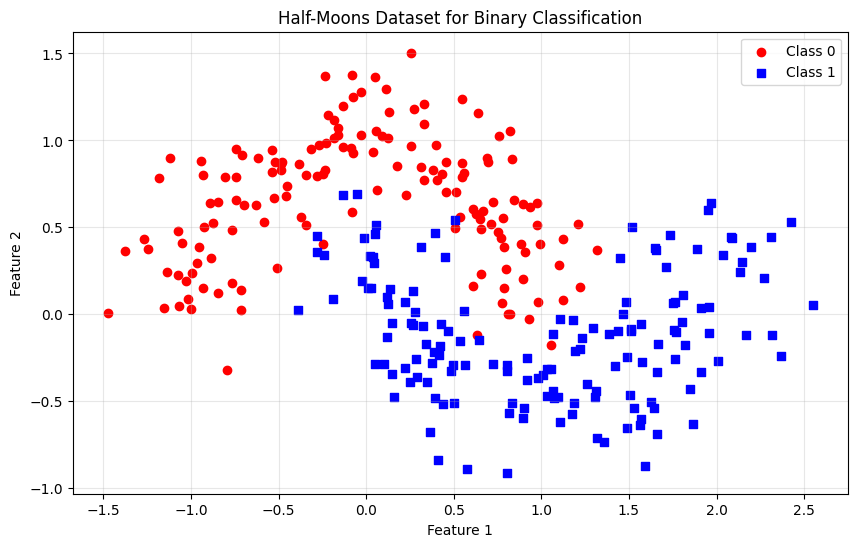

Dataset shape: (300, 2)
Labels shape: (300,)
Class distribution: [150 150]


In [18]:
# half-moons data
X_data, y_data = make_moons(n_samples=300, noise=0.2, random_state=42)


plt.figure(figsize=(10, 6))
plt.scatter(X_data[y_data==0, 0], X_data[y_data==0, 1], c='red', marker='o', label='Class 0')
plt.scatter(X_data[y_data==1, 0], X_data[y_data==1, 1], c='blue', marker='s', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Half-Moons Dataset for Binary Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Dataset shape: {X_data.shape}")
print(f"Labels shape: {y_data.shape}")
print(f"Class distribution: {np.bincount(y_data)}")

In [19]:
X_scalar = [[SScalar(float(x[0])), SScalar(float(x[1]))] for x in X_data]
y_scalar = [SScalar(float(y)) for y in y_data]

print(f"Converted {len(X_scalar)} samples to SScalar format")
print(f"Sample input: [{X_scalar[0][0].data:.3f}, {X_scalar[0][1].data:.3f}]")
print(f"Sample label: {y_scalar[0].data}")

Converted 300 samples to SScalar format
Sample input: [0.804, -0.291]
Sample label: 1.0


In [20]:
model = MLP(input_size=2, hidden_size=16, output_size=1, hidden_layers=3)
loss_fn = BCELoss()
optimizer = SGD(model.parameters(), lr=0.01)

print(f"Model parameters: {len(model.parameters())}")

losses = train(model, X_scalar, y_scalar, loss_fn, optimizer, epochs=150)

Model parameters: 881
Training model for 150 epochs...
Epoch   0/150 | Loss: 0.5840
Epoch  10/150 | Loss: 0.5175
Epoch  20/150 | Loss: 0.4672
Epoch  30/150 | Loss: 0.4255
Epoch  40/150 | Loss: 0.3925
Epoch  50/150 | Loss: 0.3785
Epoch  60/150 | Loss: 0.3670
Epoch  70/150 | Loss: 0.3518
Epoch  80/150 | Loss: 0.3593
Epoch  90/150 | Loss: 0.3719
Epoch 100/150 | Loss: 0.3897
Epoch 110/150 | Loss: 0.3608
Epoch 120/150 | Loss: 0.3496
Epoch 130/150 | Loss: 0.3416
Epoch 140/150 | Loss: 0.3522
Final Loss: 0.3431


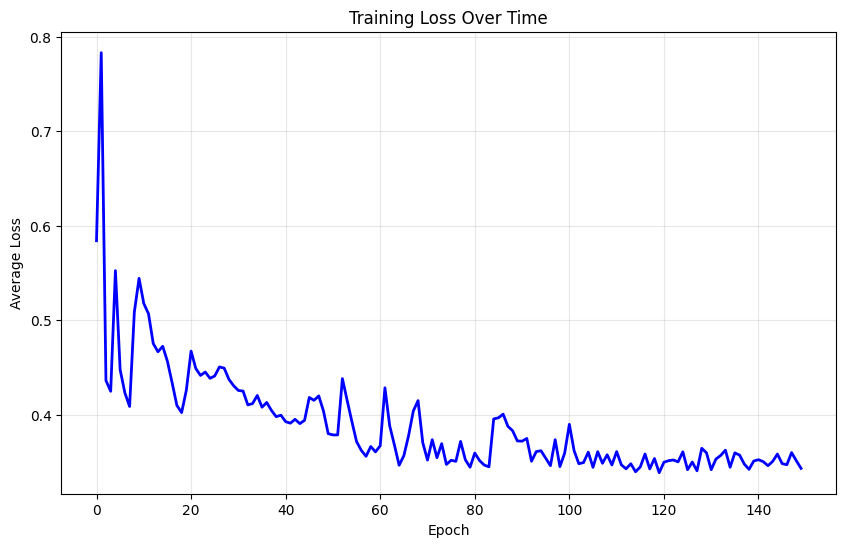

Initial loss: 0.5840
Final loss: 0.3431
Loss reduction: 41.3%


In [21]:
plot_loss(losses)

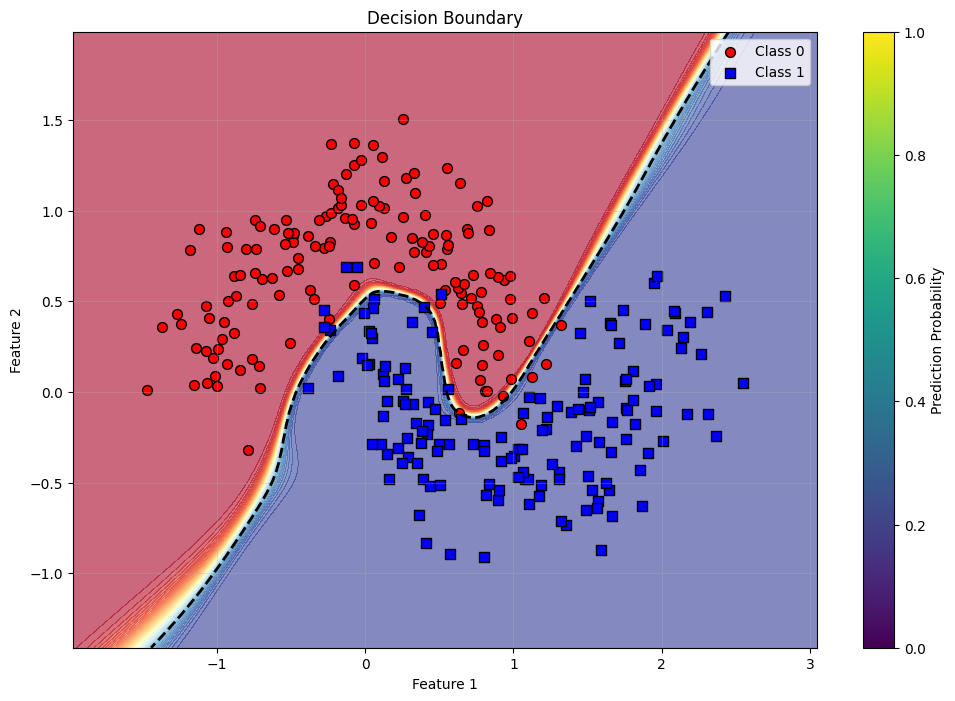

In [22]:
plot_decision_boundary(model, X_data, y_data)

In [23]:
evaluate_model(model, X_scalar, y_scalar)

Model Evaluation:
Accuracy: 0.9600 (288/300)
Confusion Matrix:
  True Negatives:  145
  False Positives: 5
  False Negatives: 7
  True Positives:  143
Precision: 0.9662
Recall: 0.9533
